# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 100
X = np.linspace(0, 1, N)
lbda = 0.1
X[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

### 1) a)

<AxesSubplot:>

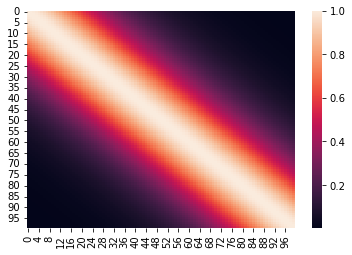

In [3]:
sigma = sigmaKov(X, X, lbda, add_noise=False)
sns.heatmap(sigma)

<AxesSubplot:>

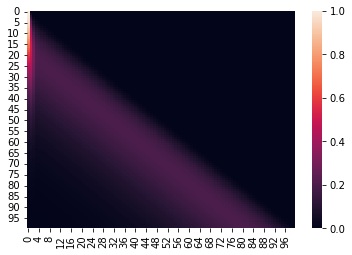

In [4]:
L = np.linalg.cholesky(sigma)
sns.heatmap(L)

Que vaut $m + L^t G$ ?

1) b)

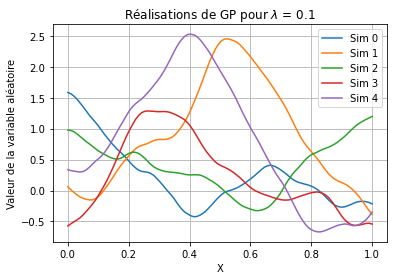

In [5]:
simulGP_gauss(X, 100, lbda)

### Question 2)

In [6]:
#N = 100
#X = np.linspace(0, 1, N)
Z = np.sin(4 * np.pi * draw_uniform_in_intervals(N))
#lbda=0.05

In [7]:
minimize_scalar(neglikelihood, args=(X, Z), method="bounded", bounds=[1e-7, 100])

     fun: array([[60978661.63140739]])
 message: 'Solution found.'
    nfev: 34
  status: 0
 success: True
       x: array([[61.8010327]])

In [18]:
def simulGP_sin(X, N, lbda):
    X_random = draw_uniform_in_intervals(N)
    Xsin = np.sin(4*np.pi*X_random)
    sigma = sigmaKov(X, X, lbda)
    L = np.linalg.cholesky(sigma)
    #Lt = L.T
    fig, ax = plt.subplots()
    plt.xlabel("X")
    plt.ylabel("Valeur de la variable aléatoire")
    plt.title(r"Réalisations de GP pour $\lambda$ = " + str(lbda))
    for i in range(2):
        g = np.random.normal(size=N)
        
        z = L @ g 
        #display(z.round(2))
        ax.plot(X_random, z, label = f"Sim {i}")
    ax.plot(X_random, Xsin, label = "Sinus")
    plt.legend()
    plt.grid()
    plt.show()


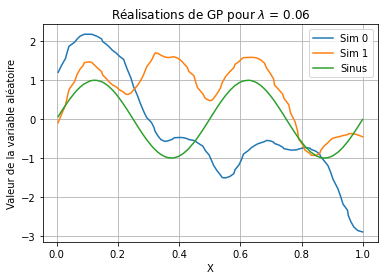

In [46]:
#minimize_scalar(neglikelihood, args=(Z))
simulGP_sin(X, N, 0.06)